<a href="https://colab.research.google.com/github/FJPO/cifar/blob/main/Cifar10_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, BatchNormalization, Flatten, MaxPooling2D, InputLayer
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import utils
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

from time import gmtime, strftime
def model_analyze(log):
  # model = keras.model.load_model(path)

  print('Final accuracy on test batch is ', round(log.history['val_accuracy'][-1]*100, 2), '%', sep = '')
  descr = ''
  if (descr == ''): descr = 'plot'
  


  fig, axis = plt.subplots(1, 2, figsize = (16, 6))

  axis[0].plot(log.history['accuracy'], 
          label='Доля верных ответов на обучающем наборе')
  # Выводим график точности на проверочной выборке
  axis[0].plot(log.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  

  # Выводим подписи осей
  axis[0].set_title('Точность')
  axis[0].set_xlabel('Эпоха обучения')
  axis[0].set_ylabel('Доля верных ответов')

  # axis[0].set_yticks([i/100 for i in range(90, 101, 1)])
  axis[0].legend()

  axis[1].plot(log.history['loss'], label='Ошибка на обучающем наборе')
  axis[1].plot(log.history['val_loss'], label='Ошибка на проверочном наборе')
  axis[1].set_title("Ошибка")
  axis[1].set_xlabel('Эпоха обучения')
  axis[1].set_ylabel('Ошибка')
  axis[1].legend()

  fig.suptitle(descr)
  plt.savefig(strftime("%Y-%m-%d %H:%M:%S", gmtime()) + '__' + descr + '.png')
  plt.show()

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)



170500096/170498071 [==============================] - 3s 0us/step


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 32, 32, 24)        1176      
_________________________________________________________________
batch_normalization_137 (Bat (None, 32, 32, 24)        96        
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 32, 32, 24)        9240      
_________________________________________________________________
batch_normalization_138 (Bat (None, 32, 32, 24)        96        
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 29, 29, 64)        24640     
_________________________________________________________________
batch_normalization_139 (Bat (None, 29, 29, 64)        256       
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 27, 27, 64)      

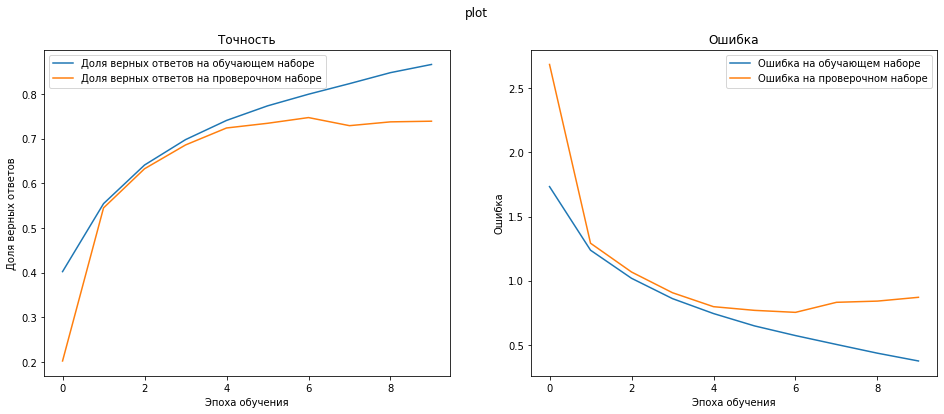

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape = (32, 32, 3)))
model.add(Conv2D(24, (4,4), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(24, (4,4), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (4,4), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.3))

# model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128, (2,2), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (2,2), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((5,5)))
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(300, activation = 'relu'))
model.add(Dense(300, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax')) #sigmoid vs softmax - no diff

model.compile(optimizer='adam', loss = 'CategoricalCrossentropy', metrics= ['accuracy'])
model.summary()
log1 = model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_split = 0.2, verbose = 1)


model_analyze(log1)
